天猫双十一美妆销售数据分析源代码

一、获取数据

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('双十一淘宝美妆数据.csv')
data.head()

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂


In [3]:
# 查看各字段信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   update_time    27598 non-null  object 
 1   id             27598 non-null  object 
 2   title          27598 non-null  object 
 3   price          27598 non-null  float64
 4   sale_count     25244 non-null  float64
 5   comment_count  25244 non-null  float64
 6   店名             27598 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


In [4]:
# 分店铺统计
data['店名'].value_counts()

店名
悦诗风吟    3021
佰草集     2265
欧莱雅     1974
雅诗兰黛    1810
倩碧      1704
美加净     1678
欧珀莱     1359
妮维雅     1329
相宜本草    1313
兰蔻      1285
娇兰      1193
自然堂     1190
玉兰油     1135
兰芝      1091
美宝莲      825
资生堂      821
植村秀      750
薇姿       746
雅漾       663
雪花秀      543
SKII     469
蜜丝佛陀     434
Name: count, dtype: int64

二、数据清洗


2.1 重复数据处理

In [5]:
# 对重复数据做删除处理
print(data.shape)
data = data.drop_duplicates(inplace=False)
print(data.shape)

(27598, 7)
(27512, 7)


In [6]:
# 此处虽然删除了重复值，但索引未变，因此应用以下方法进行重置索引
print(data.index)
data = data.reset_index(drop=True)
print('新索引：',data.index)

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       27588, 27589, 27590, 27591, 27592, 27593, 27594, 27595, 27596, 27597],
      dtype='int64', length=27512)
新索引： RangeIndex(start=0, stop=27512, step=1)


2.2 缺失值处理

In [7]:
# 查看缺失值
data.isnull().any()

update_time      False
id               False
title            False
price            False
sale_count        True
comment_count     True
店名               False
dtype: bool

有两列数据存在缺失值：sale_count, comment_count

In [8]:
# 查看数据结构
data.describe()

,price,sale_count,comment_count
count,27512.000000,2.516200e+04,25162.000000
mean,363.423512,1.231605e+04,1121.741197
std,614.876153,5.241236e+04,5277.781581
min,1.000000,0.000000e+00,0.000000
25%,99.000000,2.780000e+02,21.000000
50%,205.000000,1.443000e+03,153.000000
75%,390.000000,6.353000e+03,669.000000
max,11100.000000,1.923160e+06,202930.000000


In [9]:
# 查看sale_count列的众数
mode_01 = data.sale_count.mode()
print(mode_01)

# 查看comment_count列的众数
mode_02 = data.comment_count.mode()
print(mode_02)

0    0.0
Name: sale_count, dtype: float64
0    0.0
Name: comment_count, dtype: float64


此处两列的众数均为0，且由标签数据含义可知销售量和评论数有可能存在为0的情况，因此使用0来填充缺失值

In [10]:
# 填充缺失值
data = data.fillna(0)
# 对空值行数求和
data.isnull().sum()

update_time      0
id               0
title            0
price            0
sale_count       0
comment_count    0
店名               0
dtype: int64

2.3 提取表格中有用信息并新增为列

In [19]:
# 结巴分词库
import jieba 
# jieba.load_userdict('addwords.txt')
title_cut = []
for i in data.title:
    j = jieba.lcut(i)
    title_cut.append(j)
    
# 对标题进行分词，新增item_name_cut列
data['item_name_cut'] = title_cut
data[['title','item_name_cut']].head()
print("\n正在生成商品分类列...")
data[['sub_type', 'main_type']] = data['item_name_cut'].apply(
    lambda x: pd.Series(func1(x))
)
print("当前数据列：", data.columns.tolist())  


正在生成商品分类列...
当前数据列： ['id', 'title', 'price', 'sale_count', 'comment_count', '店名', '是否男士专用', '销售额', 'day', 'item_name_cut', 'sub_type', 'main_type']


In [12]:
# 给商品添加分类
basic_config_data = """护肤品    套装    套装                            
护肤品    乳液类    乳液    美白乳    润肤乳    凝乳    柔肤液'    亮肤乳    菁华乳    修护乳
护肤品    眼部护理    眼霜    眼部精华    眼膜                    
护肤品    面膜类    面膜                                                    
护肤品    清洁类    洗面    洁面    清洁    卸妆    洁颜    洗颜    去角质    磨砂                        
护肤品    化妆水    化妆水    爽肤水    柔肤水    补水露    凝露    柔肤液    精粹水    亮肤水    润肤水    保湿水    菁华水    保湿喷雾    舒缓喷雾
护肤品    面霜类    面霜    日霜    晚霜    柔肤霜    滋润霜    保湿霜    凝霜    日间霜    晚间霜    乳霜    修护霜    亮肤霜    底霜    菁华霜
护肤品    精华类    精华液    精华水    精华露    精华素                                        
护肤品    防晒类    防晒霜    防晒喷雾                                                
化妆品    口红类    唇釉    口红    唇彩                                            
化妆品    底妆类    散粉    蜜粉    粉底液    定妆粉     气垫    粉饼    BB    CC    遮瑕    粉霜    粉底膏    粉底霜        
化妆品    眼部彩妆    眉粉    染眉膏    眼线    眼影    睫毛膏                                    
化妆品    修容类    鼻影    修容粉    高光    腮红                                        
其他    其他    其他"""

# 将字符串basic_config_data 转为字典 category_config_map
category_config_map = {}
for config_line in basic_config_data.split('\n'):
    basic_cateogry_list = config_line.strip().strip('\n').strip('    ').split('    ')
    main_category = basic_cateogry_list[0]
    sub_category = basic_cateogry_list[1]
    unit_category_list = basic_cateogry_list[2:-1]
    for unit_category in unit_category_list:
        if unit_category and unit_category.strip().strip('    '):
            category_config_map[unit_category] = (main_category,sub_category)
            
category_config_map

{'乳液': ('护肤品', '乳液类'),
 '美白乳': ('护肤品', '乳液类'),
 '润肤乳': ('护肤品', '乳液类'),
 '凝乳': ('护肤品', '乳液类'),
 "柔肤液'": ('护肤品', '乳液类'),
 '亮肤乳': ('护肤品', '乳液类'),
 '菁华乳': ('护肤品', '乳液类'),
 '眼霜': ('护肤品', '眼部护理'),
 '眼部精华': ('护肤品', '眼部护理'),
 '洗面': ('护肤品', '清洁类'),
 '洁面': ('护肤品', '清洁类'),
 '清洁': ('护肤品', '清洁类'),
 '卸妆': ('护肤品', '清洁类'),
 '洁颜': ('护肤品', '清洁类'),
 '洗颜': ('护肤品', '清洁类'),
 '去角质': ('护肤品', '清洁类'),
 '化妆水': ('护肤品', '化妆水'),
 '爽肤水': ('护肤品', '化妆水'),
 '柔肤水': ('护肤品', '化妆水'),
 '补水露': ('护肤品', '化妆水'),
 '凝露': ('护肤品', '化妆水'),
 '柔肤液': ('护肤品', '化妆水'),
 '精粹水': ('护肤品', '化妆水'),
 '亮肤水': ('护肤品', '化妆水'),
 '润肤水': ('护肤品', '化妆水'),
 '保湿水': ('护肤品', '化妆水'),
 '菁华水': ('护肤品', '化妆水'),
 '保湿喷雾': ('护肤品', '化妆水'),
 '面霜': ('护肤品', '面霜类'),
 '日霜': ('护肤品', '面霜类'),
 '晚霜': ('护肤品', '面霜类'),
 '柔肤霜': ('护肤品', '面霜类'),
 '滋润霜': ('护肤品', '面霜类'),
 '保湿霜': ('护肤品', '面霜类'),
 '凝霜': ('护肤品', '面霜类'),
 '日间霜': ('护肤品', '面霜类'),
 '晚间霜': ('护肤品', '面霜类'),
 '乳霜': ('护肤品', '面霜类'),
 '修护霜': ('护肤品', '面霜类'),
 '亮肤霜': ('护肤品', '面霜类'),
 '底霜': ('护肤品', '面霜类'),
 '精华液': ('护肤品', '精华类'),
 '精

In [13]:
def func1(row):
    sub_type = ''   #子类别
    main_type = '' #主类别
    exist = False
    # 遍历item_name_cut 里每个词语
    for temp in row:
        # 如果词语包含在category_config_map里面，打上子类和主类标签
        if temp in category_config_map:
            sub_type = category_config_map.get(temp)[1]
            main_type = category_config_map.get(temp)[0]
            exist = True
            break
    if not exist:
        sub_type= '其他'
        main_type = '其他'
        
    return [sub_type, main_type]

In [14]:
# 将“是否男士专用”新增为一列
data['是否男士专用'] = data['item_name_cut'].apply(
    lambda x: '是' if any(word in {'男', '男士', '男生'} for word in x) else '否'
)
data.head()

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,是否男士专用
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",否
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",否
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...",否
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g...",是
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...",否


In [15]:
# 新增销售额、购买日期（天）为一列
# 销售额=销售量*价格
data['销售额'] = data.sale_count*data.price

# 新增购买日期为一列
# 转换时间格式
data['update_time'] = pd.to_datetime(data['update_time'])

data[['update_time']].head()

,update_time
0,2016-11-14
1,2016-11-14
2,2016-11-14
3,2016-11-14
4,2016-11-14


In [16]:
# 将时间设置为新的index
data = data.set_index('update_time')

# 新增时间“天”为一列
data['day'] = data.index.day

# 删除中文分词的一列
del data['item_name_cut']

In [17]:
# 查看最终数据表格
data.head()

,id,title,price,sale_count,comment_count,店名,是否男士专用,销售额,day
update_time,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,否,1575668.0,14
2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,否,1254132.0,14
2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,是,980590.0,14
2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,否,722244.0,14


In [18]:
# 保存清理好的数据为Excel格式
data.to_excel('./清洗完成的数据.xlsx',sheet_name='clean_data')

三、数据分析与挖掘

3.1 探索性数据分析（EDA）与可视化

In [20]:
#导入所需的库
import matplotlib.pyplot as plt
import matplotlib as mpl
#指定默认字体并解决负号'-'显示为方块的问题
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

3.1.1 各品牌SKU数

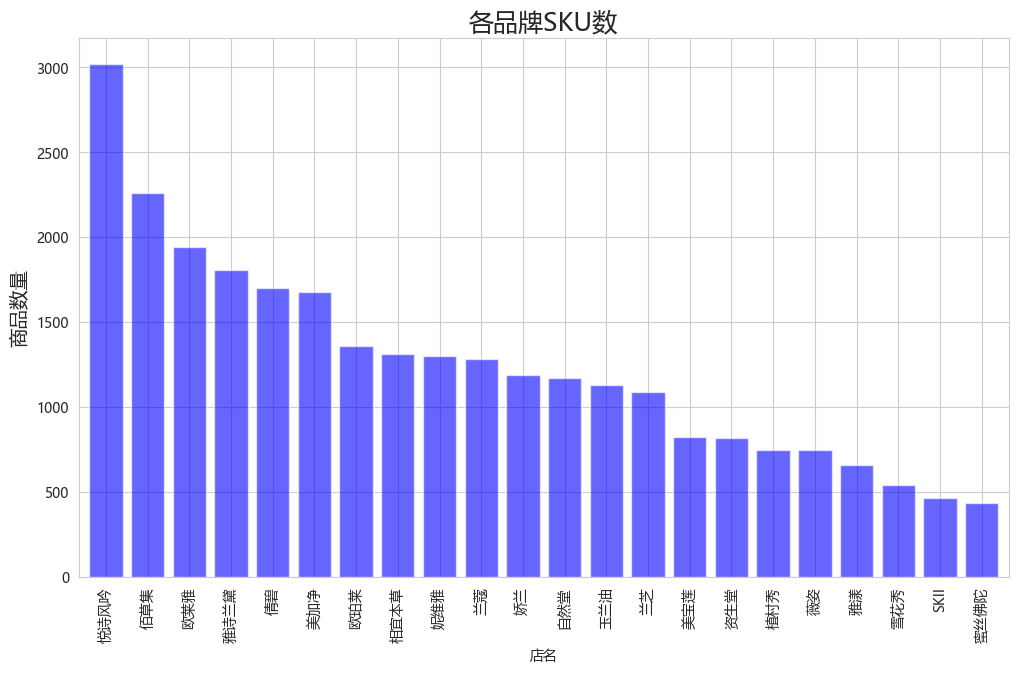

In [22]:
plt.figure(figsize=(12,7))
# 计算各店铺的商品数量
data['店名'].value_counts().sort_values(ascending=False).plot.bar(width=0.8,alpha=0.6,color='b')

plt.title('各品牌SKU数',fontsize=18)
plt.ylabel('商品数量',fontsize=14)
plt.show()

图中展示了不同美妆品牌的SKU数量分布，其中“悦诗风吟”以接近3000个SKU位居榜首，其次是“佰草集”和“欧莱雅”，而其他多数品牌的SKU数量则相对较少，显示出市场上品牌SKU数量的显著差异和多样性。

3.1.2 品牌总销量和总销售额

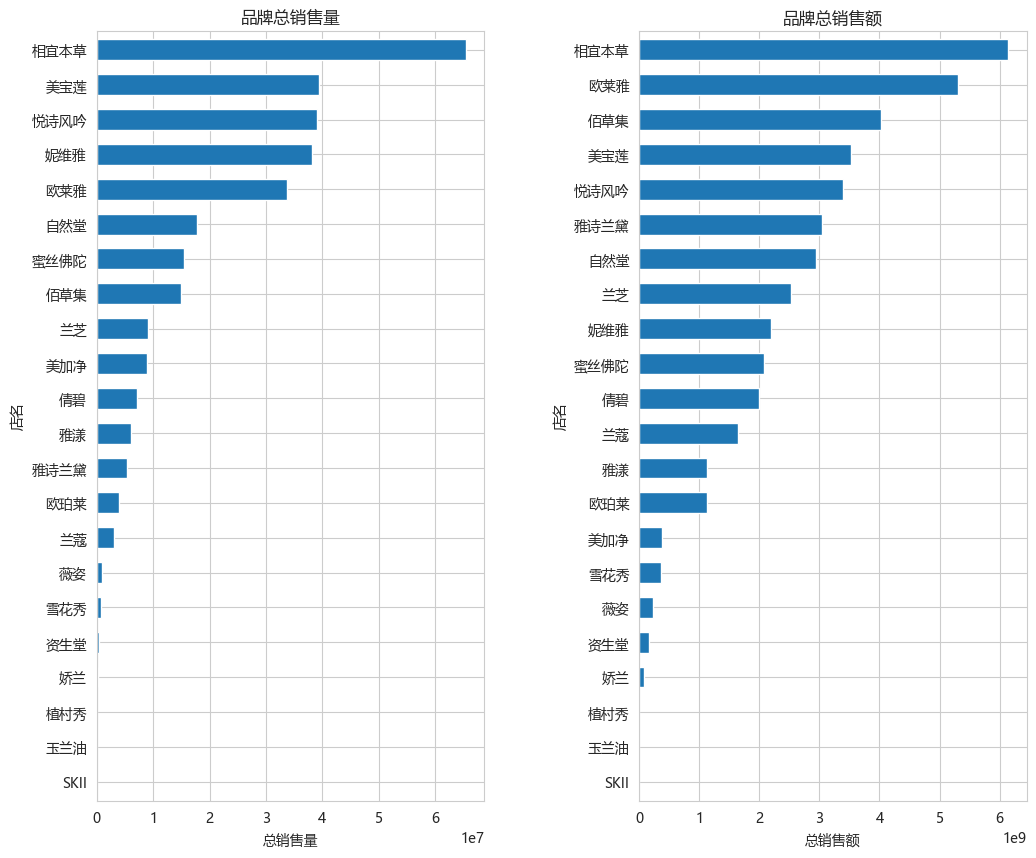

In [23]:
fig,axes = plt.subplots(1,2,figsize=(12,10))

ax1 = data.groupby('店名').sale_count.sum().sort_values(ascending=True).plot(kind='barh',ax=axes[0],width=0.6)
ax1.set_title('品牌总销售量',fontsize=12)
ax1.set_xlabel('总销售量')

ax2 = data.groupby('店名')['销售额'].sum().sort_values(ascending=True).plot(kind='barh',ax=axes[1],width=0.6)
ax2.set_title('品牌总销售额',fontsize=12)
ax2.set_xlabel('总销售额')

plt.subplots_adjust(wspace=0.4)
plt.show()

图中可以看出，相宜本草在销售量和销售额上均排名第一，其次是美宝莲和悦诗风吟。这表明这些品牌在市场上具有较强的竞争力和较高的消费者认可度。其他品牌如佰草集、妮维雅、欧莱雅等也表现不俗，但与前三名相比仍有差距。整体来看，市场集中度较高，头部品牌占据了较大的市场份额

3.1.3 各类别的销售量、销售额情况

（一）主类别与子类别的销售量占比

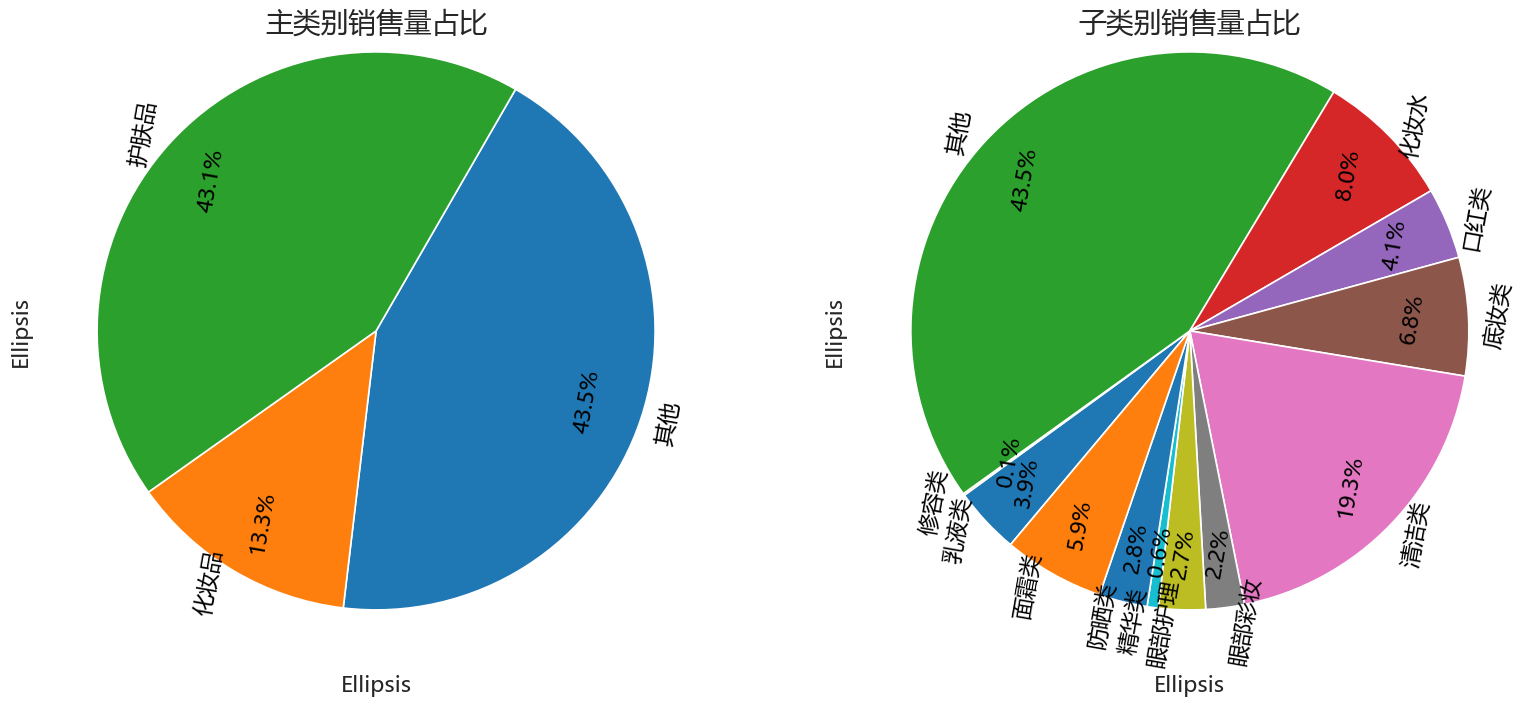

In [24]:
fig,axes = plt.subplots(1,2,figsize=(18,12))

data1 = data.groupby('main_type')['sale_count'].sum()
ax1 = data1.plot(kind='pie',ax=axes[0],autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
pctdistance=0.8, # 设置百分比标签与圆心的距离
labels= data1.index,
labeldistance = 1.05, # 设置标签与圆心的距离
startangle = 60, # 设置饼图的初始角度
radius = 1.2, # 设置饼图的半径
counterclock = False, # 是否逆时针，这里设置为顺时针方向
wedgeprops = {'linewidth': 1.2, },# 设置饼图内外边界的属性值
textprops = {'fontsize':16, 'color':'k','rotation':80}, # 设置文本标签的属性值
)
ax1.set_title('主类别销售量占比',fontsize=20)

data2 = data.groupby('sub_type')['sale_count'].sum()
ax2 = data2.plot(kind='pie',ax=axes[1],autopct='%.1f%%', 
pctdistance=0.8, 
labels= data2.index,
labeldistance = 1.05,
startangle = 230, 
radius = 1.2, 
counterclock = False, 
wedgeprops = {'linewidth': 1.2, },
textprops = {'fontsize':16, 'color':'k','rotation':80}, 
)

ax2.set_title('子类别销售量占比',fontsize=20)

# 设置坐标标签
ax1.set_xlabel(..., fontsize=16,labelpad=38.5)
ax1.set_ylabel(..., fontsize=16,labelpad=38.5)
ax2.set_xlabel(..., fontsize=16,labelpad=38.5)
ax2.set_ylabel(..., fontsize=16,labelpad=38.5)
plt.subplots_adjust(wspace=0.4)
plt.show()

这两张饼图展示了不同类别和子类别的销售量占比。左图显示护肤品和化妆品是主要类别，各占43%左右，而其他类别占13%。右图则细分了子类别，护肤品中的清洁类占比最高，为19.3%，其次是底妆类和口红类。化妆品中，化妆水占比最高，为8%。总体来看，护肤品在整体销售中占据主导地位，而清洁类和底妆类是护肤品中的主要子类别。

（二）各品牌各总类的销售量

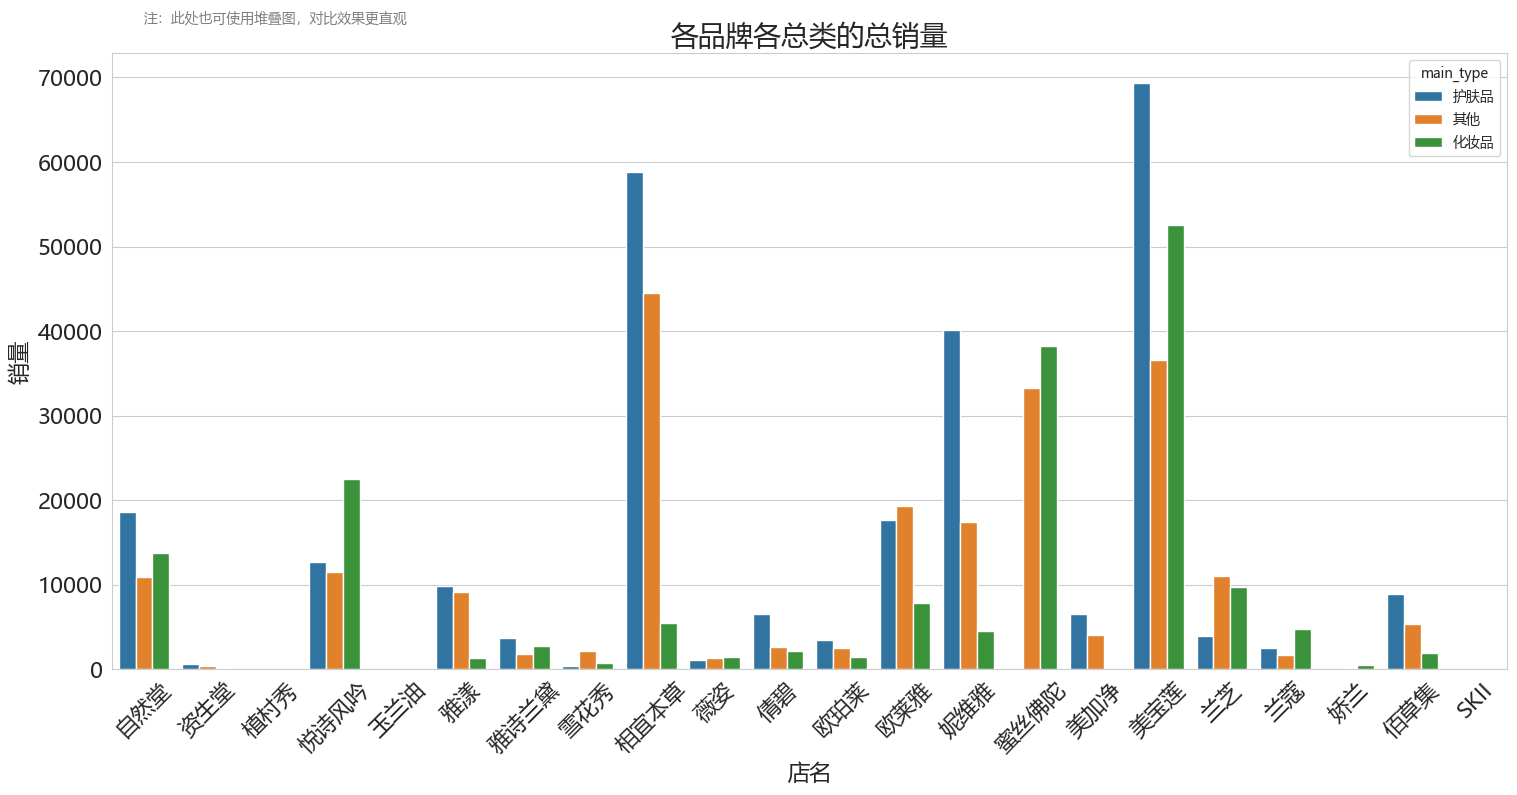

In [25]:
plt.figure(figsize=(18,8))
sns.barplot(x='店名',y='sale_count',hue='main_type',data=data,saturation=0.75,errorbar=('ci', 0))
plt.title('各品牌各总类的总销量', fontsize=20)
plt.ylabel('销量',fontsize=16)
plt.xlabel('店名',fontsize=16)
plt.text(0,78000,'注：此处也可使用堆叠图，对比效果更直观',
         verticalalignment='top', horizontalalignment='left',color='gray', fontsize=10)
# 设置刻度字体大小

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.show()

这张柱状图展示了各品牌在护肤品、底妆和化妆品三个总类中的总销量。相宜本草在护肤品类中销量最高，而美加净在化妆品类中表现突出。总体来看，护肤品类的销量普遍高于底妆和化妆品类，显示出消费者对护肤品的需求较大。各品牌在不同类别中的表现差异明显，部分品牌在某一类别中表现特别突出。

（三）各品牌各类的总销售额

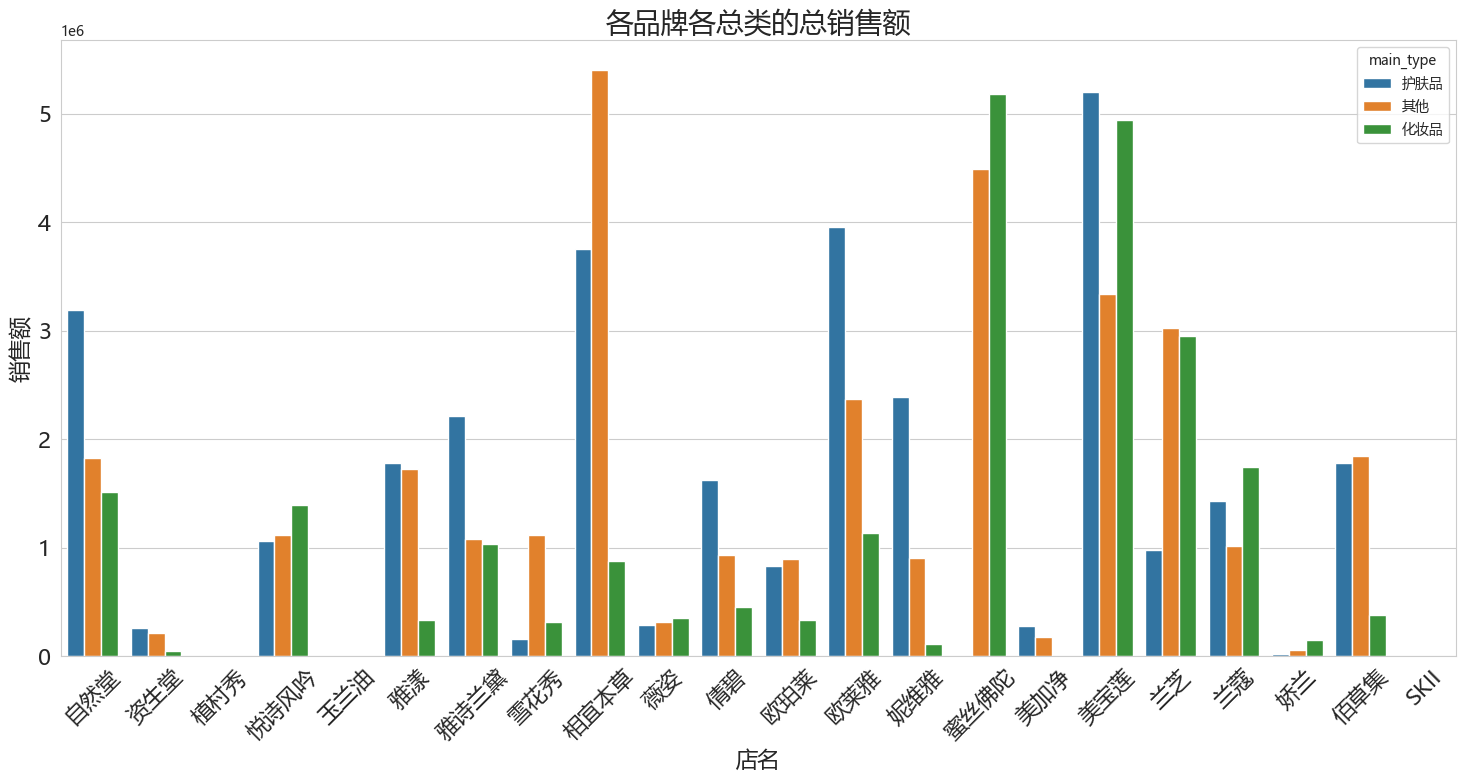

In [26]:
plt.figure(figsize=(18,8))
sns.barplot( x = '店名',
y = '销售额',hue = 'main_type',data =data,saturation = 0.75,errorbar=('ci', 0))
plt.ylabel('销售额',fontsize=16)
plt.xlabel('店名',fontsize=16)
plt.title('各品牌各总类的总销售额',fontsize=20)
# 设置刻度字体大小
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.show()

这张柱状图展示了各品牌在护肤品、底妆和化妆品三个总类中的总销售额。相宜本草在护肤品类中销售额最高，而美加净在化妆品类中表现突出。总体来看，护肤品类在各品牌中的销售额普遍较高，显示出消费者对护肤品的需求较大。各品牌在不同类别中的表现差异明显，部分品牌在某一类别中表现特别突出。

（四）各品牌各子类的总销量

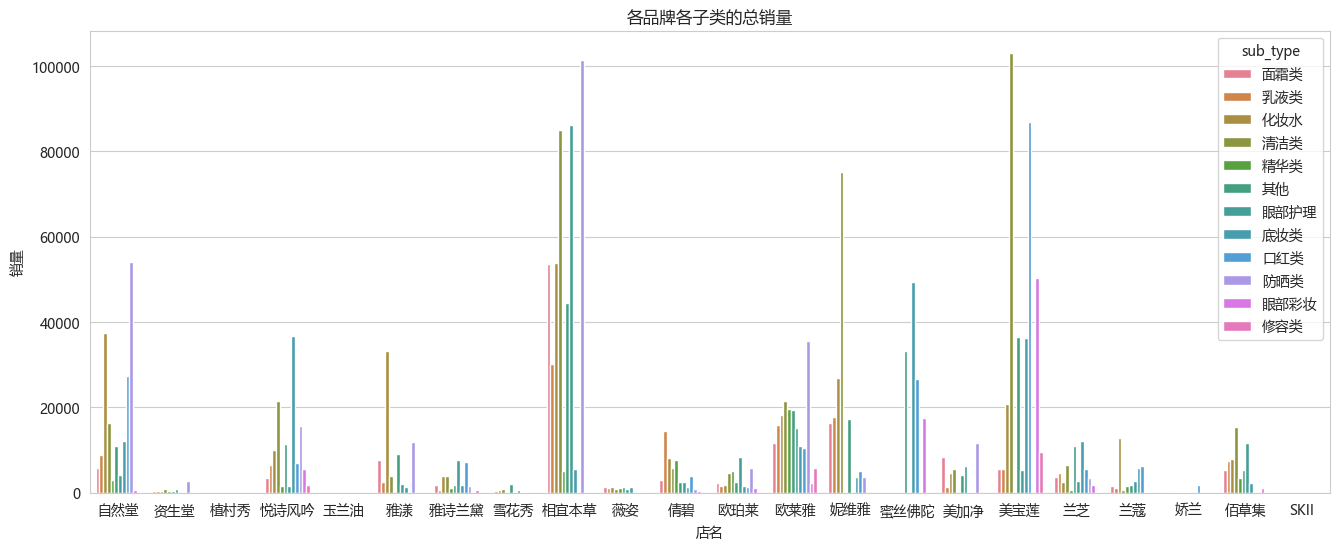

In [27]:
plt.figure(figsize = (16,6))
sns.barplot( x = '店名',
y = 'sale_count',hue = 'sub_type',data =data,saturation = 0.75,errorbar=('ci', 0))
plt.title('各品牌各子类的总销量')
plt.ylabel('销量')
plt.show()

图中展示了各品牌在不同子类别中的总销量。图中显示了多个子类别，如面霜类、乳液类、化妆水等。相宜本草在多个子类别中表现突出，尤其是在护肤品类中，销量显著高于其他品牌。美加净和欧莱雅在某些子类别中也有较高的销量。整体来看，各品牌在不同子类别中的销量差异较大，显示出不同品牌在特定产品类别中的优势。

（五）各品牌各子类的总销售额

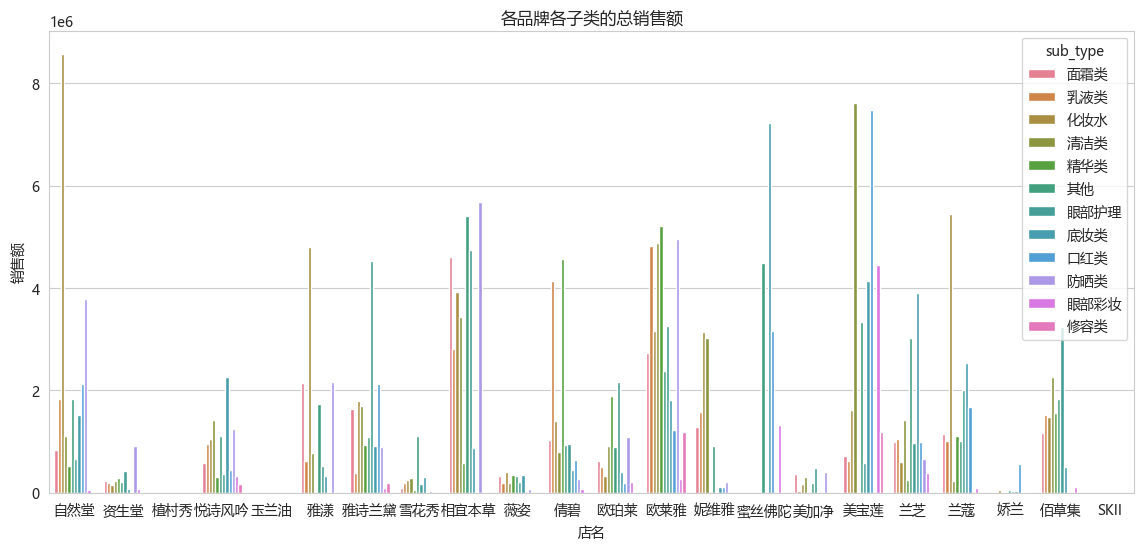

In [28]:
plt.figure(figsize = (14,6))
sns.barplot( x = '店名',
y = '销售额',hue = 'sub_type',data =data,saturation = 0.75,errorbar=('ci', 0))
plt.title('各品牌各子类的总销售额')
plt.ylabel('销售额')
plt.show()

这张图展示了各品牌在不同子类别中的总销售额。图中显示了多个子类别，如面霜类、乳液类、化妆水等。自然堂和美宝莲在多个子类别中表现突出，尤其是在护肤品类中，销售额显著高于其他品牌。相宜本草和欧莱雅在某些子类别中也有较高的销售额。整体来看，各品牌在不同子类别中的销售额差异较大，显示出不同品牌在特定产品类别中的优势。

3.1.4 各品牌热度

（一）各品牌商品的平均评论数

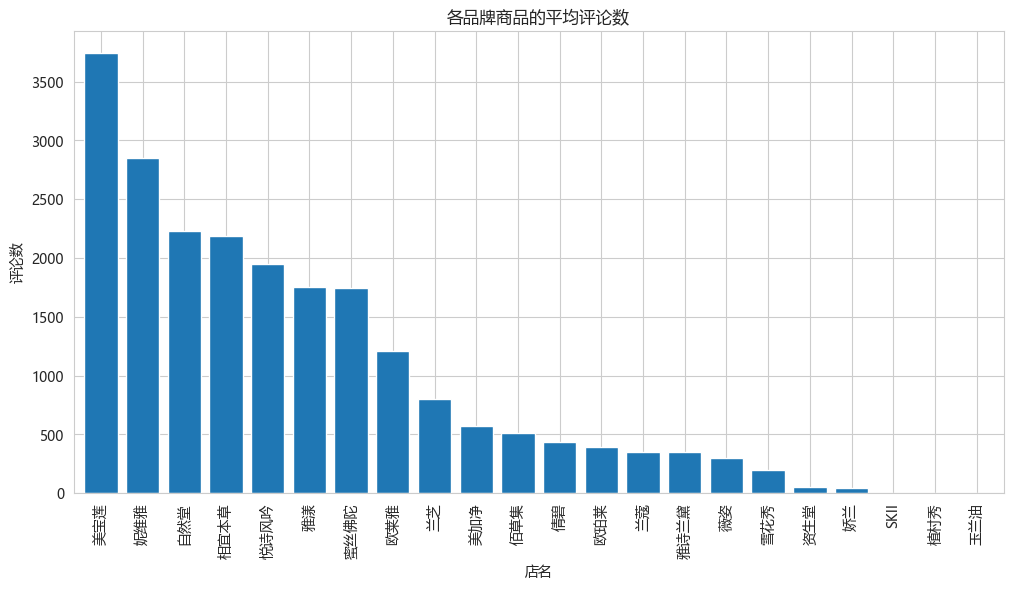

In [29]:
plt.figure(figsize = (12,6))
data.groupby('店名').comment_count.mean().sort_values(ascending=False).plot(kind='bar',width=0.8)
plt.title('各品牌商品的平均评论数')
plt.ylabel('评论数')
plt.show()

图中可以看出美宝莲以显著的优势位居榜首，评论数超过3500，显示出其产品的高受欢迎度和用户参与度。妮维雅和自然堂紧随其后，评论数也较高。其他品牌如相宜本草、悦诗风吟等的评论数相对较低，但仍显示出一定的市场关注度。总体来看，评论数的分布显示出不同品牌在消费者中的受欢迎程度差异较大。

（二）使用Seaborn绘制热度散点图

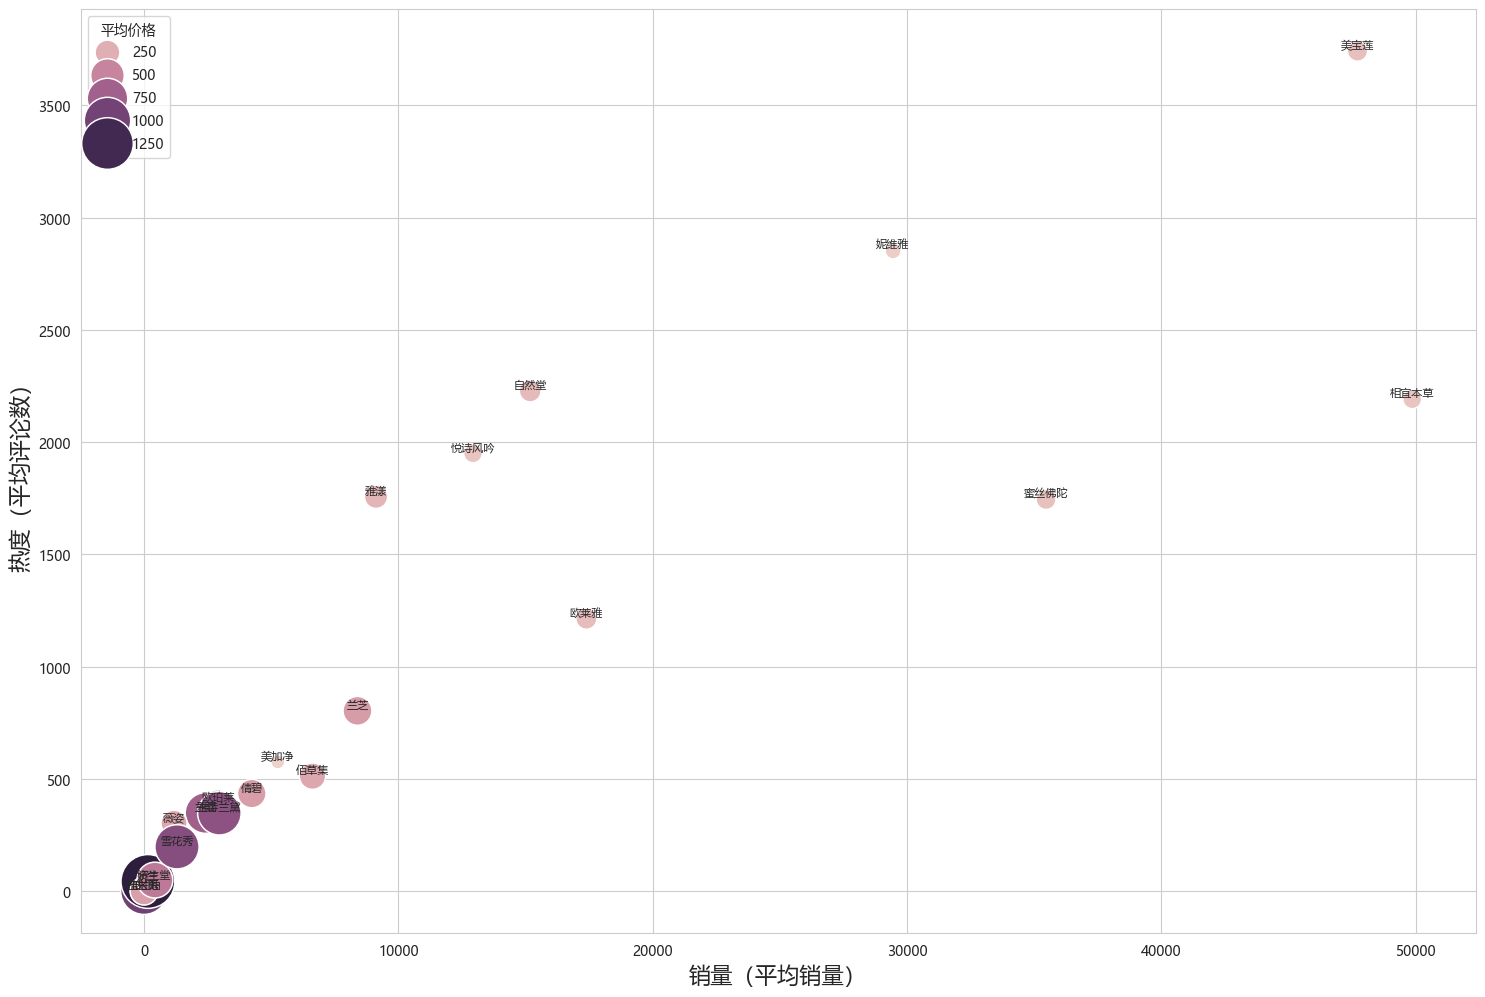

In [30]:
plt.figure(figsize=(18, 12))

# 计算每个店名的平均销量、评论数和价格
grouped_data = data.groupby('店名').agg(
    avg_sale_count=('sale_count', 'mean'),
    avg_comment_count=('comment_count', 'mean'),
    avg_price=('price', 'mean'),
    count=('id', 'count')
).reset_index()

# 使用 Seaborn 绘制散点图
sns.scatterplot(
    x='avg_sale_count',  # X 轴：平均销量
    y='avg_comment_count',  # Y 轴：平均评论数
    size='avg_price',  # 点的大小：平均价格
    hue='avg_price',  # 点的颜色：平均价格
    sizes=(100, 1500),  # 点的大小范围
    data=grouped_data  # 数据来源
)

# 添加注释：店名
for i in range(len(grouped_data)):
    plt.annotate(
        grouped_data['店名'][i], 
        xy=(grouped_data['avg_sale_count'][i], grouped_data['avg_comment_count'][i]),
        fontsize=8, 
        ha='center', 
        va='bottom'
    )

# 设置坐标轴标签
plt.ylabel('热度（平均评论数）', fontsize=16)
plt.xlabel('销量（平均销量）', fontsize=16)

# 设置图例位置
plt.legend(loc='upper left', title='平均价格')

# 显示图形
plt.show()

该气泡图展示了不同品牌的平均销量和热度（平均评论数），并用气泡大小表示平均价格。美宝莲和相宜本草在销量和热度上均表现突出，显示出较高的市场接受度和消费者关注度。其他品牌如自然堂、悦诗风吟等在销量和热度上相对较低，但价格差异较大。总体来看，销量和热度之间存在一定的正相关关系，价格则在不同品牌间有显著差异。

3.1.5 各品牌价格

（一）绘制价格箱型图

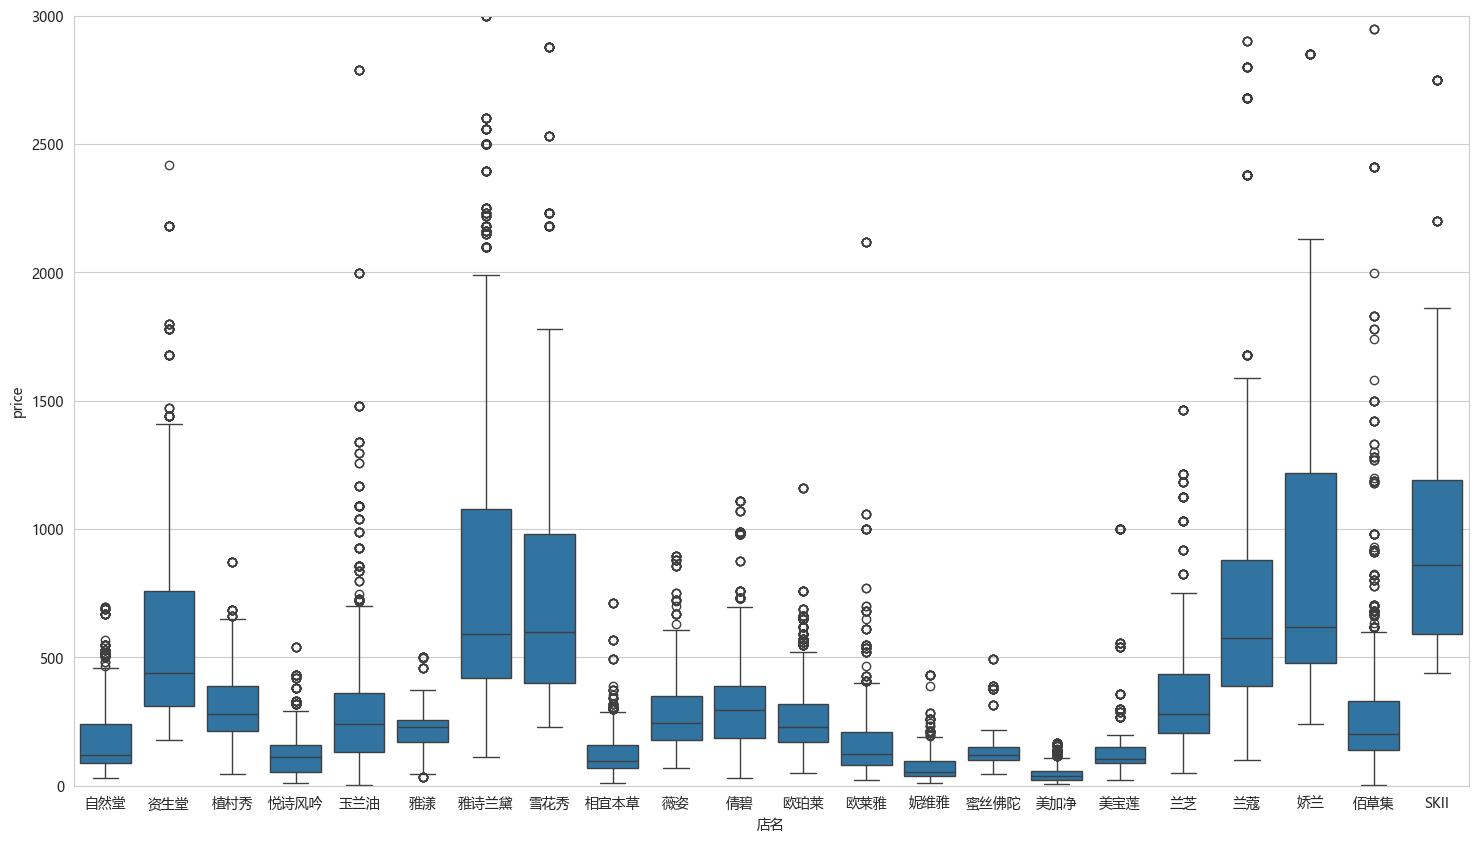

In [31]:
#查看价格的箱型图
plt.figure(figsize=(18,10))
sns.boxplot(x='店名',y='price',data=data)
plt.ylim(0,3000)#如果不限制，就不容易看清箱型，所以把Y轴刻度缩小为0-3000
plt.show()

这张图揭示了不同品牌商品的价格分布特征，其中雅诗兰黛、兰蔻和SK-II等品牌的中位数和价格范围较高，表明其市场定位偏向高端，而自然堂和相宜本草等品牌的价格分布较为分散，显示出多样化的产品定价策略。图中的异常值反映了部分品牌的高价位产品，进一步突显了品牌内部的价格差异。

（二）计算各品牌产品的平均价格

In [47]:
data.groupby('店名').price.sum()
avg_price=data.groupby('店名').price.sum()/data.groupby('店名').price.count()
avg_price

店名
SKII    1011.727079
佰草集      289.823171
倩碧       346.092190
兰芝       356.615809
兰蔻       756.400778
妮维雅       73.789053
娇兰      1361.043588
悦诗风吟     121.245945
植村秀      311.786667
欧珀莱      276.218543
欧莱雅      167.282698
玉兰油      329.657294
相宜本草     122.958446
美加净       44.694619
美宝莲      148.757576
自然堂      180.130213
薇姿       281.085791
蜜丝佛陀     142.118894
资生堂      577.438490
雅漾       212.618401
雅诗兰黛     872.470718
雪花秀      901.082873
Name: price, dtype: float64

（三）绘制各品牌平均价格柱状图

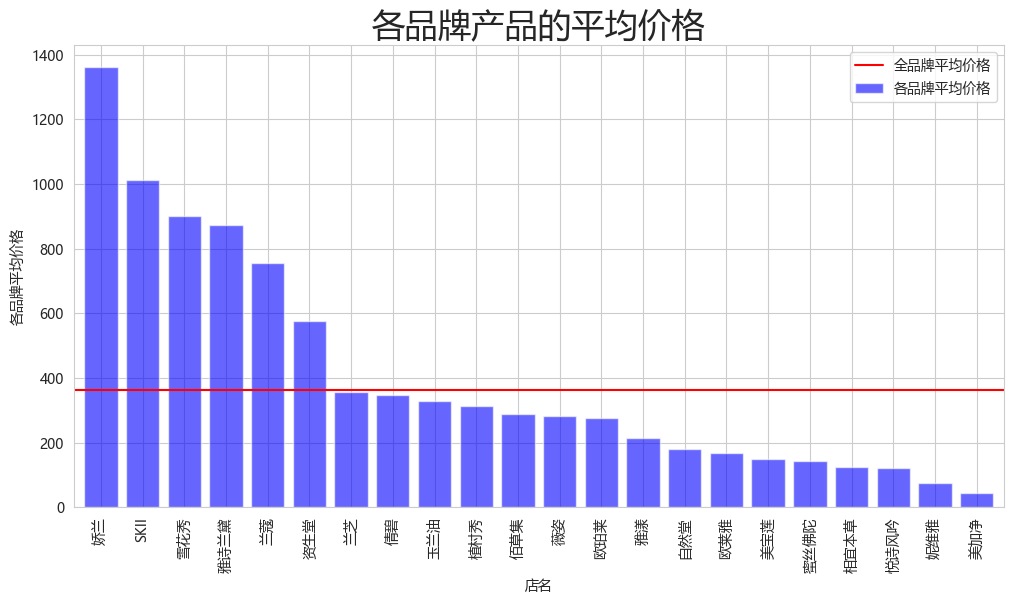

In [38]:
fig = plt.figure(figsize=(12,6))
avg_price.sort_values(ascending=False).plot(kind='bar',width=0.8,alpha=0.6,color='b',label='各品牌平均价格')
y = data['price'].mean()
plt.axhline(y,0,5,color='r',label='全品牌平均价格')
plt.ylabel('各品牌平均价格')
plt.title('各品牌产品的平均价格',fontsize=24)
plt.legend(loc='best')
plt.show()

图中显示了各品牌产品的平均价格，其中娇兰的平均价格最高，超过1300元，显著高于其他品牌。SK-II和雪花秀的平均价格也较高，均在1000元以上。大多数品牌的平均水平低于全品牌平均价格（约400元），这表明市场上存在价格差异较大的品牌。

（四）绘制各品牌平均价格散点图

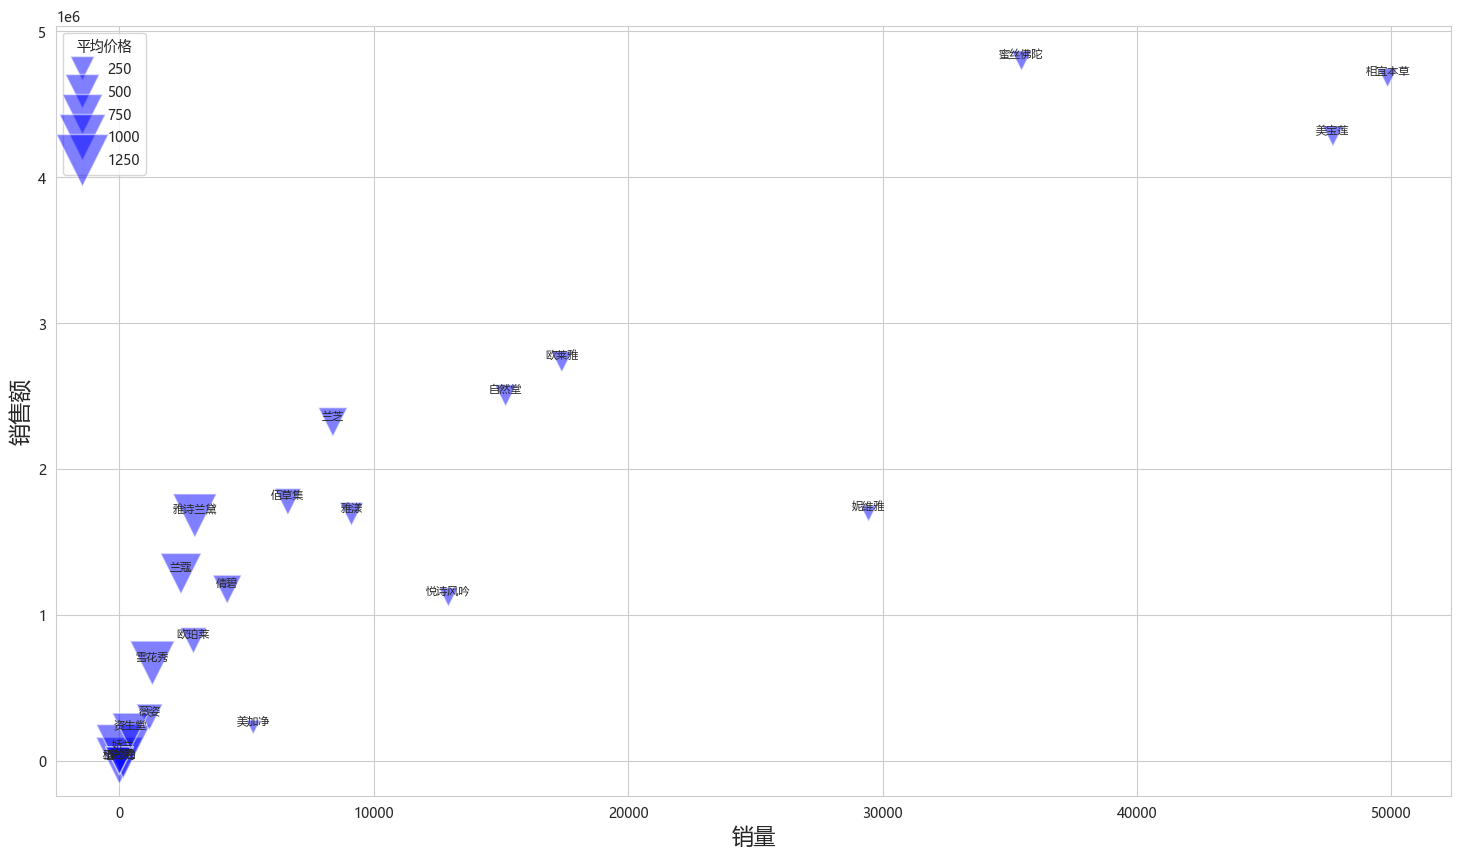

In [44]:
plt.figure(figsize=(18, 10))

# 计算每个店名的平均销量、平均销售额和平均价格
grouped_data = data.groupby('店名').agg(
    avg_sale_count=('sale_count', 'mean'),  # 平均销量
    avg_sales=('销售额', 'mean'),  # 平均销售额
    avg_price=('price', 'mean')  # 平均价格
).reset_index()

# 使用 Seaborn 绘制散点图
sns.scatterplot(
    x='avg_sale_count',  # X 轴：平均销量
    y='avg_sales',  # Y 轴：平均销售额
    size='avg_price',  # 点的大小：平均价格
    sizes=(100, 1500),  # 点的大小范围
    marker='v',  # 点的形状
    alpha=0.5,  # 点的透明度
    color='b',  # 点的颜色
    data=grouped_data  # 数据来源
)

# 添加注释：店名
for i in range(len(grouped_data)):
    plt.annotate(
        grouped_data['店名'][i], 
        xy=(grouped_data['avg_sale_count'][i], grouped_data['avg_sales'][i]),
        xytext=(grouped_data['avg_sale_count'][i] + 0.2, grouped_data['avg_sales'][i] + 0.2),
        fontsize=8, 
        ha='center', 
        va='bottom'
    )

# 设置坐标轴标签
plt.ylabel('销售额', fontsize=16)
plt.xlabel('销量', fontsize=16)

# 设置图例位置
plt.legend(loc='upper left', title='平均价格')

# 显示图形
plt.show()

散点图展示了各品牌的销量与销售额之间的关系，并通过不同大小的三角形表示平均价格。图中显示，美宝莲和相宜本草的销量和销售额均较高，且平均价格较低，表明其产品在市场上具有较强的竞争力。而雅诗兰黛和兰蔻虽然销量较低，但由于其高平均价格，销售额仍然较高。整体来看，销量和销售额之间存在正相关关系，但不同品牌的平均价格差异显著影响了销售额。

3.1.6 男性护肤品销量情况

（一）各品牌男士销售数量

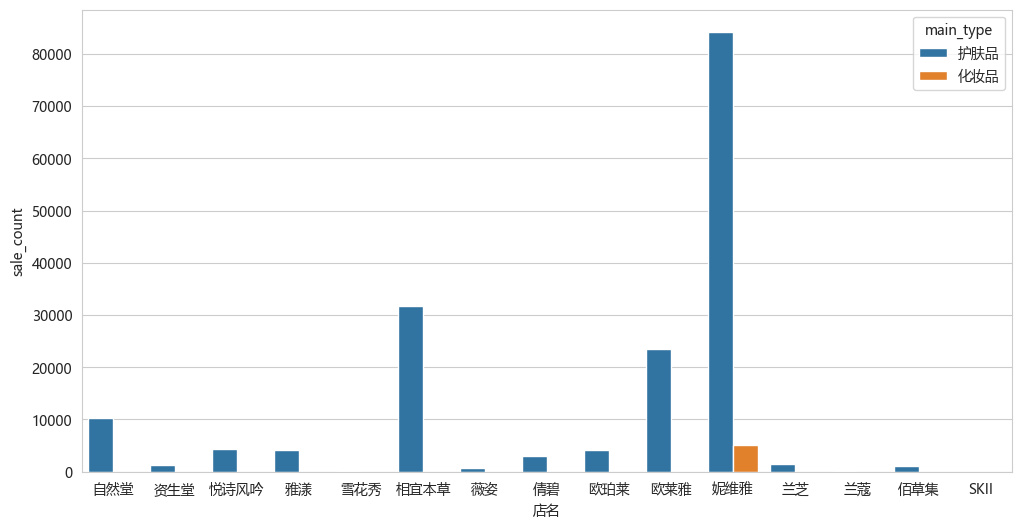

In [45]:
gender_data=data[data['是否男士专用']=='是']
gender_data_1=gender_data[(gender_data.main_type =='护肤品')| (gender_data.main_type=='化妆品')]
plt.figure(figsize = (12,6))
sns.barplot(x='店名',y='sale_count',hue='main_type',data =gender_data_1,saturation=0.75,errorbar=('ci', 0))
plt.show()

柱状图展示了各品牌护肤品和化妆品的销售数量。图中显示，妮维雅在护肤品类中销量最高，超过80000件，而化妆品类的销量相对较低。相宜本草在护肤品类中也有较高的销量，接近30000件。其他品牌如自然堂、欧莱雅等的销量相对较低。整体来看，护肤品的销量普遍高于化妆品。

（二）男士护肤品的销量和销售额排名

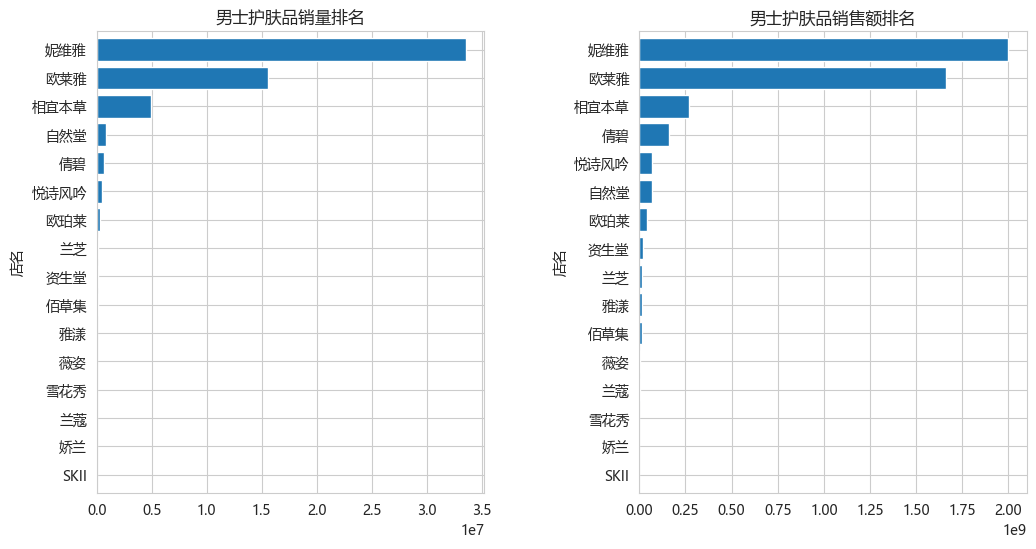

In [46]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
gender_data.groupby('店名').sale_count.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax1)
ax1.set_title('男士护肤品销量排名')

gender_data.groupby('店名').销售额.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax2)
ax2.set_title('男士护肤品销售额排名')

plt.subplots_adjust(wspace=0.4)
plt.show()

这两张图分别展示了男士护肤品的销量和销售额排名。妮维雅在销量和销售额上均排名第一，显示出其在男士护肤品市场中的领先地位。欧莱雅和相宜本草分别位列第二和第三，表现也较为突出。其他品牌如自然堂、倩碧等的销量和销售额相对较低。总体来看，市场集中度较高，头部品牌占据了主要市场份额。

3.2 分析算法设计与模型建立

3.2.1 销售趋势分析算法（时间序列分析）

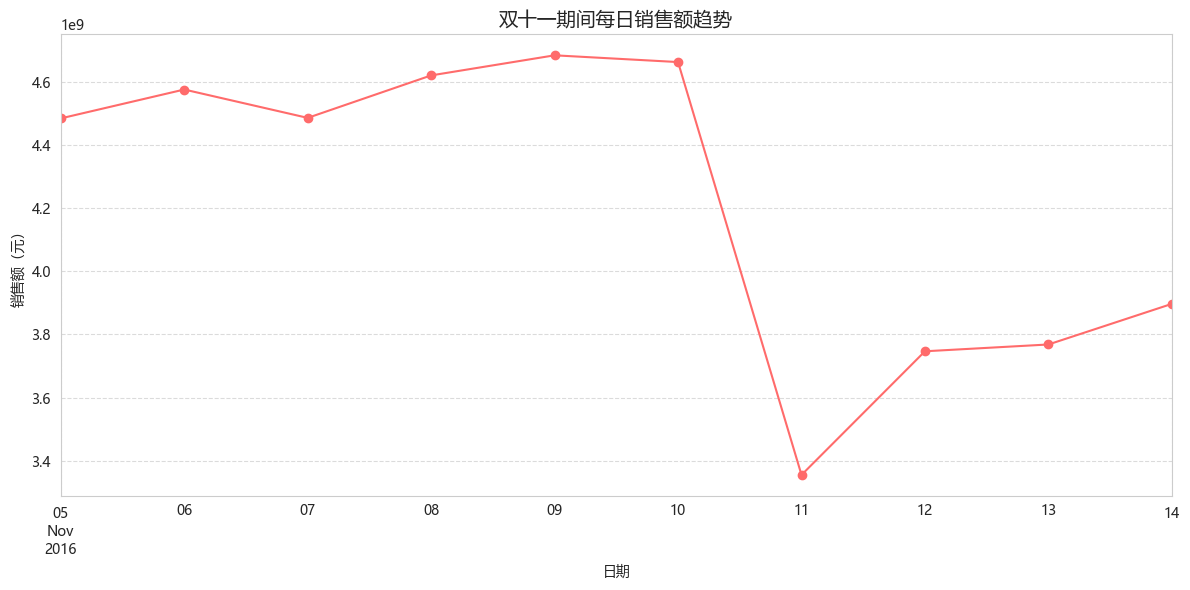

In [39]:
def analyze_sales_trend():
    # 按天统计销售数据
    daily_sales = data.resample('D').agg({
        'sale_count': 'sum',
        '销售额': 'sum'
    })
    
    # 绘制销售趋势图
    plt.figure(figsize=(12, 6))
    daily_sales['销售额'].plot(marker='o', color='#FF6B6B')
    plt.title('双十一期间每日销售额趋势', fontsize=14)
    plt.xlabel('日期')
    plt.ylabel('销售额（元）')
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    return daily_sales

# 执行趋势分析
daily_sales = analyze_sales_trend()

销售趋势分析模块揭示了双十一期间销售额的显著波动，其中活动前几天销售额逐步上升，反映出消费者对促销活动的期待和购物热情的积累。11月10日达到销售高峰，可能由于消费者希望在双十一前锁定最佳优惠。然而，双十一当天销售额急剧下降，可能是因为部分消费者已提前完成购物，或因价格波动而观望。之后销售额逐渐回升，可能是由于后续促销活动或消费者继续购买之前未能购得的商品。基于此趋势，建议商家在双十一前加强预热活动，吸引消费者关注，同时在双十一当天提供更具吸引力的优惠以维持销售势头。活动结束后，商家应继续推出促销活动以刺激消费者的购买欲望，并通过分析消费者行为优化未来的营销策略。

3.2.2 商品分类分析算法（聚类分析）

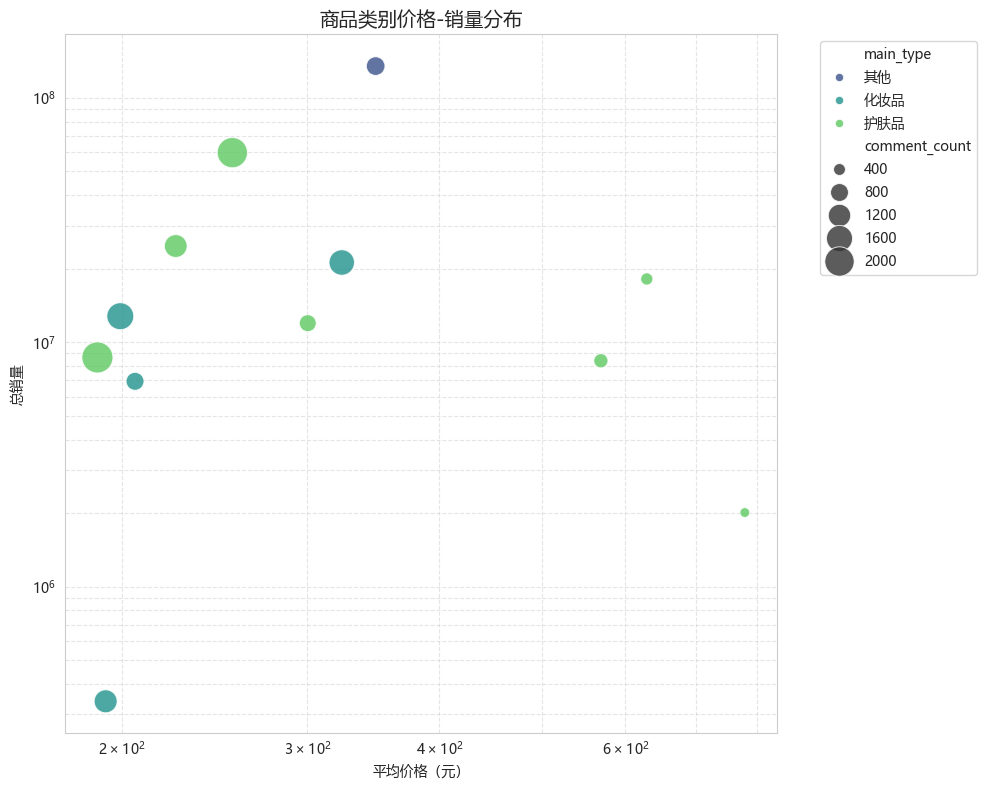

In [50]:
def analyze_product_categories():
    # 按商品类别分析
    category_analysis = data.groupby(['main_type', 'sub_type']).agg({
        'price': 'mean',
        'sale_count': 'sum',
        'comment_count': 'mean'
    }).reset_index()
    
    # 绘制价格-销量气泡图
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=category_analysis, 
                   x='price', 
                   y='sale_count',
                   size='comment_count',
                   hue='main_type',
                   sizes=(50, 500),
                   alpha=0.8,
                   palette='viridis')
    plt.title('商品类别价格-销量分布', fontsize=14)
    plt.xlabel('平均价格（元）')
    plt.ylabel('总销量')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    return category_analysis

# 执行类别分析
category_results = analyze_product_categories()

根据气泡图分析，护肤品在中低价位销量较高，建议品牌在这一价格区间推出更多产品以满足大众需求，并可通过增加产品附加值吸引高端消费者；化妆品在中等价格区间表现良好，品牌应在此区间推出创新产品，并利用限量版或联名款提升口红和底妆等子类别的吸引力。同时，针对高端产品可实施促销活动以提高销量，而对于销量高的产品可通过捆绑销售提高客单价。此外，品牌需明确产品市场定位，避免在同一价格区间内推出过多相似产品，并通过差异化策略提升市场竞争力。

3.2.3 价格敏感度建模（随机森林回归模型）

价格敏感度模型评估：
R²分数：0.906
RMSE：16837.7


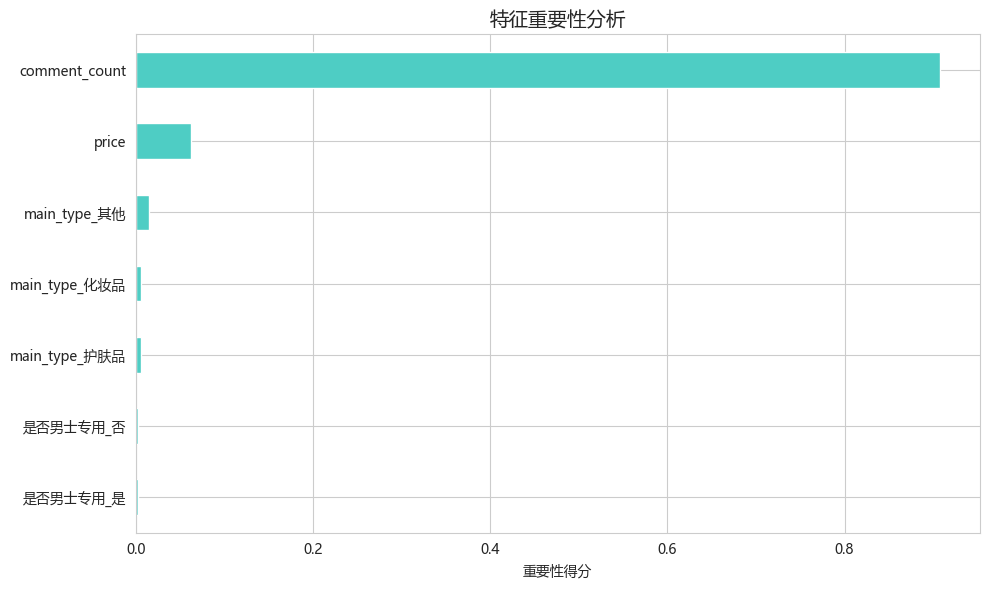

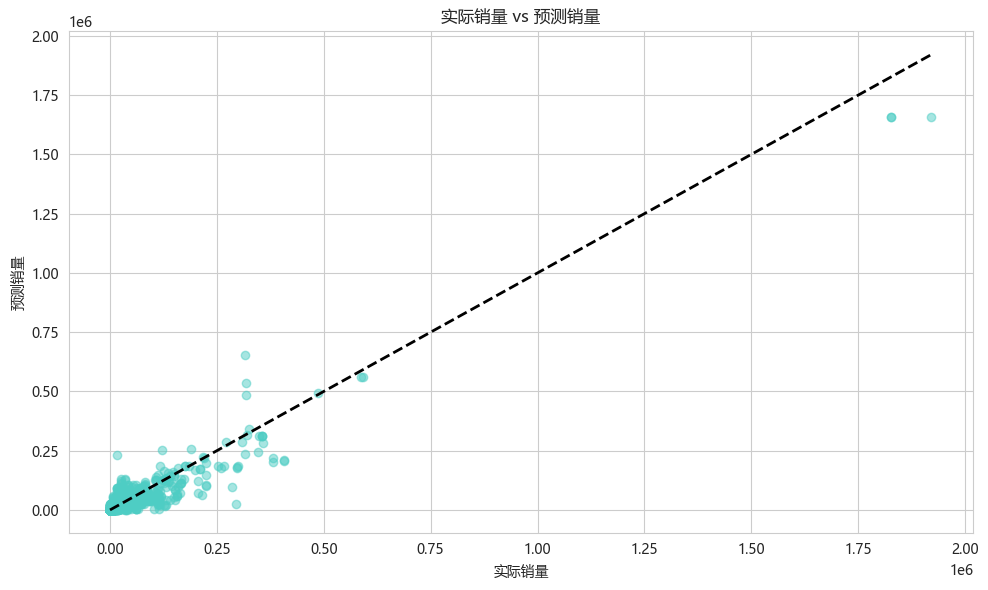

In [38]:
def analyze_price_sensitivity():
    # 数据预处理
    analysis_df = data[['price', 'sale_count', 'comment_count', '是否男士专用', 'main_type']].copy()
    
    # 转换分类变量
    analysis_df = pd.get_dummies(analysis_df, columns=['是否男士专用', 'main_type'])
    
    # 划分数据集
    X = analysis_df.drop('sale_count', axis=1)
    y = analysis_df['sale_count']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 训练随机森林模型
    rf_model = RandomForestRegressor(n_estimators=100, 
                                   random_state=42,
                                   max_depth=8,
                                   min_samples_leaf=5)
    rf_model.fit(X_train, y_train)
    
    # 模型评估
    y_pred = rf_model.predict(X_test)
    print('='*40)
    print('价格敏感度模型评估：')
    print(f'R²分数：{r2_score(y_test, y_pred):.3f}')
    print(f'RMSE：{np.sqrt(mean_squared_error(y_test, y_pred)):.1f}')
    
    # 特征重要性可视化
    feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10, 6))
    feat_importance.sort_values().plot(kind='barh', color='#4ECDC4')
    plt.title('特征重要性分析', fontsize=14)
    plt.xlabel('重要性得分')
    plt.tight_layout()
    plt.show()
    
    # 预测结果可视化
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='#4ECDC4')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('实际销量')
    plt.ylabel('预测销量')
    plt.title('实际销量 vs 预测销量')
    plt.tight_layout()
    plt.show()
    
    return rf_model

# 执行价格敏感度分析
price_model = analyze_price_sensitivity()

模型的R²分数为0.906，说明模型能够较好地解释销量变化的原因，而RMSE为16837.7，表明预测误差在可接受范围内。基于随机森林模型的分析，发现除了价格和评论数量，产品类别（如化妆品和护肤品）和是否为男士专用产品同样对销量有显著影响。商家应考虑这些因素，实施更加精细化的市场策略。例如，对于评论数量高的热门产品，可以通过增加曝光和促销活动进一步提升销量。对于价格敏感型产品，商家可以通过捆绑销售或提供折扣来吸引价格敏感的消费者。同时，针对不同产品类别和目标消费群体（如男士专用产品），商家应设计专门的营销活动，以满足特定需求并提升品牌形象。此外，商家应持续监测模型预测性能，并根据市场反馈调整策略，确保营销资源的有效分配。通过这些措施，商家可以更精准地满足市场需求，优化库存管理，并提高整体销售业绩。

3.2.4 热销商品预测模型（XGBoost）

热销商品预测模型评估：
R²分数：0.969
RMSE：9636.1


<Figure size 1000x600 with 0 Axes>

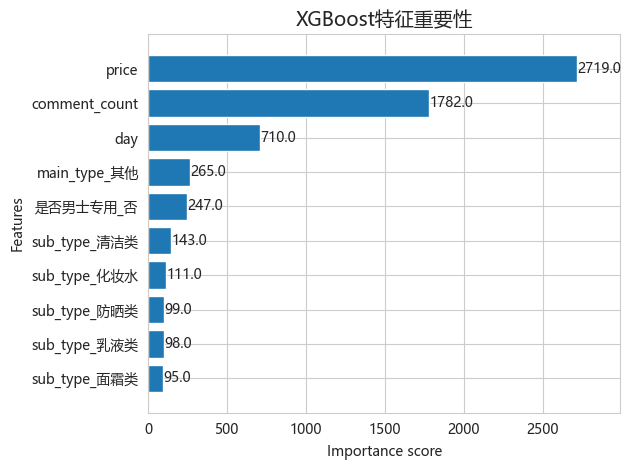

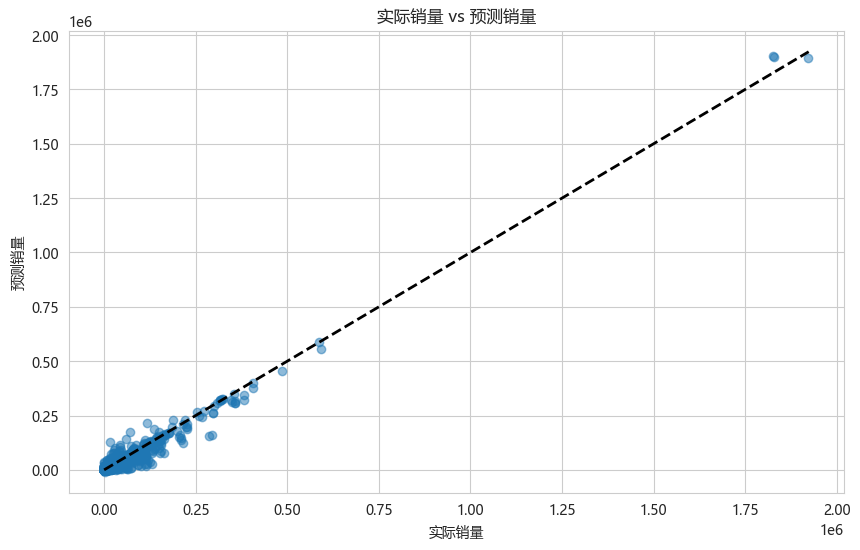

模型已保存为 sales_predictor.pkl


In [36]:
def build_sales_predictor():
    # 特征工程
    predict_df = data[['price', 'comment_count', '是否男士专用', 'main_type', 'sub_type', 'day', 'sale_count']].copy()
    
    # 转换分类特征
    predict_df = pd.get_dummies(predict_df, columns=['是否男士专用', 'main_type', 'sub_type'])
    
    # 划分数据集
    X = predict_df.drop('sale_count', axis=1)
    y = predict_df['sale_count']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 训练XGBoost模型
    xgb_model = xgb.XGBRegressor(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    
    # 模型评估
    y_pred = xgb_model.predict(X_test)
    print('='*40)
    print('热销商品预测模型评估：')
    print(f'R²分数：{r2_score(y_test, y_pred):.3f}')
    print(f'RMSE：{np.sqrt(mean_squared_error(y_test, y_pred)):.1f}')
    
    # 特征重要性可视化
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(xgb_model, max_num_features=10, height=0.8)
    plt.title('XGBoost特征重要性', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # 预测结果展示
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('实际销量')
    plt.ylabel('预测销量')
    plt.title('实际销量 vs 预测销量')
    plt.show()
    
    return xgb_model

# 执行预测模型训练
sales_predictor = build_sales_predictor()

# 保存最终模型
import joblib
joblib.dump(sales_predictor, 'sales_predictor.pkl')
print('模型已保存为 sales_predictor.pkl')

模型评估显示该模型具有较高的拟合度（R² 0.969），可作为制定营销策略的可靠依据。鉴于价格对销量的影响最为显著，建议商家灵活运用定价策略，例如在竞争激烈时段推出限时折扣或满减活动以刺激消费，同时针对不同消费群体实施差异化定价，如会员专享价或产品组合套餐，以提升价格竞争力。评论数量对销量也有重要影响，商家应积极鼓励消费者进行评价，通过优化产品质量与服务来争取好评，定期展示优质评论以增强潜在客户的信任，并及时处理负面评价以转化为提升契机。此外，模型显示特定日期的销量波动明显，商家可据此提前布局营销活动，如在节假日或新品首发时加大推广力度，合理调配资源以最大化效益。针对不同类型产品，商家应依据其重要性分配营销资源，重点推广高贡献品类，同时探索创新手段挖掘低关注度但有潜力品类的市场。鉴于模型在极端值预测上存在偏差，建议商家持续收集数据以优化模型，并在制定生产与库存计划时预留弹性空间，以降低库存成本与缺货风险。